In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sqlite3
import base64
from tqdm import tqdm_notebook as t
%matplotlib inline

In [185]:
N = 2687592411512374403

d = {}
for i in os.listdir(str(N)):
    if i[-4:] == ".csv":
        d[i[:-4]] = pd.read_csv(os.path.join(str(N),i))

def dessida(l):
    if type(l) != str:
        return l
    llista = eval(l)
    for dic in llista:
        dic['data'] = base64.b64decode(dic['data'])
    return llista

d['player_state'] = d['player_state'][d['player_state'].posX >= -80000]

N1 = d['game_frame'].events.dropna().index[0]

d['game_frame'] = d['game_frame'].iloc[N1+1:]

d['game_frame'].events = d['game_frame'].events.apply(dessida)

# Definim un encounter A -> B com dues persones A, B suficientment a prop i un A dins el rang de visió de B

In [ ]:
jugadors = ps.playerguid.unique()

posicions = {}
for k in jugadors:
    posicions[k] = (ps.posX[ps.playerguid == k], ps.posY[ps.playerguid == k], ps.posZ[ps.playerguid == k])

ps = d['player_state']

ps = ps.sort_values("framenumber")

def ultim_frame_on_apareix_un_pavo(pavo):
    return ps.framenumber[ps.playerguid == pavo].max()

#Classificacio
classi = sorted([(i, ultim_frame_on_apareix_un_pavo(i)) for i in jugadors], key = lambda x: x[1], reverse = True)
classi

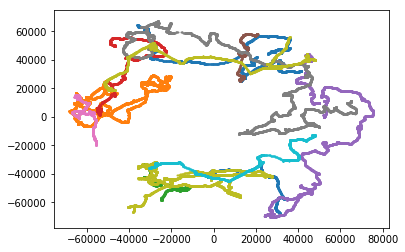

In [195]:
for k in jugadors:
    plt.scatter(*posicions[k][0:2], s = 1)

In [300]:
def on_esta(pavo, frame):
    aux = ps[(ps.playerguid == pavo) & (ps.framenumber == frame)]
    if len(aux) > 0:
        aux = aux.iloc[0]
    else:
        return [None]*3
    return (aux.posX, aux.posY, aux.posZ)

In [197]:

"""Sidotes de quaternions to make Jordi Quer proud """

def q_conjugate(q):
    w, x, y, z = q
    return (w, -x, -y, -z)

def q_mult(q1, q2):
    w1, x1, y1, z1 = q1
    w2, x2, y2, z2 = q2
    w = w1 * w2 - x1 * x2 - y1 * y2 - z1 * z2
    x = w1 * x2 + x1 * w2 + y1 * z2 - z1 * y2
    y = w1 * y2 + y1 * w2 + z1 * x2 - x1 * z2
    z = w1 * z2 + z1 * w2 + x1 * y2 - y1 * x2
    return w, x, y, z

def qv_mult(q1, v1):
    q2 = (0.0,) + v1
    return q_mult(q_mult(q1, q2), q_conjugate(q1))[1:]

In [302]:
def a_on_mira(pavo, frame):
    aux = ps[(ps.playerguid == pavo) & (ps.framenumber == frame)]
    if len(aux) > 0:
        aux = aux.iloc[0]
    else:
        return [None]*3
    quaternio = (aux.viewW, aux.viewX, aux.viewY, aux.viewZ)
    return qv_mult(quaternio, (1,0,0))
    

In [199]:
def qui_esta_viu(frame):
    return [i[0] for i in classi if i[1] > frame]

In [201]:
llista_frames = ps.framenumber.unique()

In [202]:
llista_frames

array([10029, 10031, 10033, ..., 37735, 37737, 37739])

In [205]:
qui_esta_viu(llista_frames[-10])

['Angel_Hahn']

In [248]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

In [305]:
def dist(a,b):
    if a[0] == None or b[0] == None:
        return 1e10
    return np.linalg.norm(np.array(a)-np.array(b))**1/2

In [285]:
frame

10033

In [288]:
qui_esta_viu(frame)

['Angel_Hahn',
 'Christopher_Cox',
 'Stacy_Butler',
 'Hector_Higgins',
 'Pro',
 'Sherry_Wong',
 'Samantha_Martinez',
 'Misty_Jones',
 'Michael_Lewis',
 'Yvonne_Haas']

In [298]:
on_esta("Stacby_Butler", frame) 

In [332]:
len(distancies)

45

In [335]:
posicions

[(6085.99853515625, -44244.87109375),
 (-47448.48828125, 18205.40625),
 (65266.375, 10928.73046875),
 (41601.8984375, -48056.484375),
 (41200.125, 32131.337890625),
 (-47087.7578125, 49966.140625),
 (-24690.16796875, -58602.16796875),
 (46528.546875, -12500.9384765625),
 (-55497.9765625, -19399.662109375),
 (20817.12890625, 58253.90234375)]

In [333]:
len(jugadors_vius)

10

In [345]:
minim = 1e10
for frame in t(llista_frames):
    radi = 7500
    jugadors_vius = qui_esta_viu(frame) #Ordre canònic
    posicions = [on_esta(i, frame)[0:2] for i in jugadors_vius]
    posicions = [i for i in posicions if i[0] != None]
    distancies = squareform(pdist(posicions))
    for i in range(len(jugadors_vius)):
        for j in range(i):
            if distancies[i,j] < 7500:
                print("h")

IndexError: index 8 is out of bounds for axis 0 with size 8

In [340]:
from scipy.spatial.distance import pdist, squareform

In [320]:
posicions = [on_esta(i, llista_frames[0])[0:2] for i in qui_esta_viu(llista_frames[0])]

In [321]:
posicions

[(6085.99853515625, -44244.87109375),
 (-47448.48828125, 18205.40625),
 (65266.375, 10928.73046875),
 (41601.8984375, -48056.484375),
 (41200.125, 32131.337890625),
 (-47087.7578125, 49966.140625),
 (-24690.16796875, -58602.16796875),
 (46528.546875, -12500.9384765625),
 (-55497.9765625, -19399.662109375),
 (20817.12890625, 58253.90234375)]

In [323]:
pdist(posicions) < 7500

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [309]:
minim

5.295850086360738

In [351]:
dins_rang_visio(posicions[i], posicions[j], on_miren[i])

IndexError: list index out of range

In [353]:
i

8

In [356]:
on_miren = [a_on_mira(i, frame)[0:2] for i in jugadors_vius]
on_miren = [i/np.linalg.norm(i) if i[0] != None else None for i in on_miren]


In [357]:
on_miren

[None,
 array([0.76553752, 0.64339125]),
 array([-0.16793831, -0.98579751]),
 array([-0.36355964, -0.93157093]),
 array([-0.89600882,  0.44403625]),
 array([ 0.72199556, -0.69189769]),
 None,
 array([-0.91276648,  0.40848177]),
 array([-0.62896763,  0.77743149]),
 None]

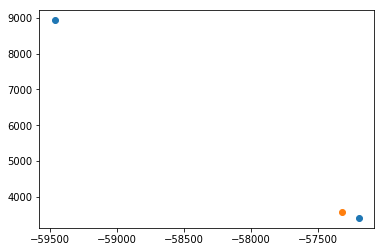

In [371]:
plt.scatter([posicions[i][0],posicions[j][0]],[posicions[i][1],posicions[j][1]])
plt.scatter(posicions[i][0]+on_miren[i][0]*200,posicions[i][1]+on_miren[i][1]*200)

In [373]:
for frame in t(llista_frames):
    radi = 10000
    jugadors_vius = qui_esta_viu(frame) #Ordre canònic
    posicions = [on_esta(i, frame)[0:2] for i in jugadors_vius]
    on_miren = [a_on_mira(i, frame)[0:2] for i in jugadors_vius]
    on_miren = [i/np.linalg.norm(i) if i[0] != None else None for i in on_miren]
    distancies = squareform(pdist(posicions))
    for i in range(len(jugadors_vius)):
        for j in range(i):
            if distancies[i,j] < radi:
                if dins_rang_visio(posicions[i],posicions[j],on_miren[i]):
                    print("encounter", i, j, frame)
                if dins_rang_visio(posicions[i],posicions[j],on_miren[j]):
                    print("encounter", j, i, frame)
                

lol
encounter 8 1 11652
lol
encounter 8 1 11654
lol
encounter 8 1 11655
lol
encounter 8 1 11657
lol
encounter 8 1 11659
lol
encounter 8 1 11660
lol
encounter 8 1 11662
lol
encounter 8 1 11664
lol
encounter 8 1 11734
lol
encounter 8 1 11736
lol
encounter 8 1 11738
lol
encounter 8 1 11740
lol
encounter 8 1 11742
lol
encounter 8 1 11744
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
encounter 8 1 11781
lol
encounter 8 1 11783
lol
encounter 8 1 11785
lol
encounter 8 1 11787
lol
encounter 8 1 11789
lol
lol
encounter 8 1 11793
lol
lol
lol
lol
lol
lol
lol
encounter 8 1 11874
lol
encounter 8 1 11876
lol
encounter 8 1 11878
lol
encounter 8 1 11896
lol
encounter 8 1 12177
lol
encounter 8 1 12179
lol
encounter 8 1 12181
lol
encounter 8 1 12183
lol
encounter 8 1 12184
lol
encounter 8 1 12186
lol
encounter 8 1 12188
lol
encounter 8 1 12202
lol
encounter 8 1 12218
lol
encounter 8 1 12220
lol
encounter 8 1 12222
lol
encounter 8 1 12224
lol
encounter 8 1 12226
lol
encounte

lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol


lol
encounter 6 0 14548
lol
lol
encounter 6 0 14550
lol
lol
encounter 6 0 14552
lol
lol
encounter 6 0 14553
lol
lol
encounter 6 0 14555
lol
lol
encounter 6 0 14557
lol
lol
encounter 6 0 14559
lol
lol
encounter 6 0 14561
lol
lol
encounter 6 0 14563
lol
lol
encounter 6 0 14565
lol
lol
encounter 6 0 14567
lol
lol
encounter 6 0 14569
lol
lol
encounter 6 0 14571
lol
lol
encounter 6 0 14573
lol
lol
encounter 6 0 14575
lol
lol
encounter 6 0 14577
lol
lol
encounter 6 0 14579
lol
lol
encounter 6 0 14581
lol
lol
encounter 6 0 14582
lol
lol
encounter 6 0 14584
lol
lol
lol
encounter 6 0 14587
lol
lol
encounter 6 0 14589
lol
lol
encounter 6 0 14591
lol
lol
encounter 6 0 14592
lol
lol
encounter 6 0 14594
lol
lol
encounter 6 0 14596
lol
lol
encounter 6 0 14597
lol
lol
encounter 6 0 14599
lol
lol
encounter 6 0 14601
lol
encounter 8 1 14601
lol
encounter 6 0 14603
lol
encounter 8 1 14603
lol
encounter 6 0 14605
lol
encounter 8 1 14605
lol
encounter 6 0 14607
lol
encounter 8 1 14607
lol
encounter 6 0 14

lol
encounter 6 0 14973
lol
encounter 8 1 14973
lol
encounter 6 0 14975
lol
encounter 8 1 14975
lol
encounter 6 0 14977
lol
encounter 8 1 14977
lol
encounter 6 0 14979
lol
encounter 8 1 14979
lol
encounter 6 0 14981
lol
encounter 8 1 14981
lol
encounter 6 0 14983
lol
encounter 8 1 14983
lol
encounter 8 1 14985
lol
encounter 8 1 14987
lol
encounter 8 1 14989
lol
encounter 6 0 14991
lol
encounter 8 1 14991
lol
encounter 6 0 14993
lol
encounter 8 1 14993
lol
encounter 6 0 14995
lol
encounter 8 1 14995
lol
encounter 6 0 14997
lol
encounter 8 1 14997
lol
encounter 6 0 14999
lol
encounter 8 1 14999
lol
encounter 6 0 15001
lol
encounter 8 1 15001
lol
encounter 6 0 15002
lol
encounter 8 1 15002
lol
encounter 6 0 15004
lol
encounter 8 1 15004
lol
encounter 6 0 15006
lol
encounter 8 1 15006
lol
encounter 6 0 15008
lol
encounter 8 1 15008
lol
encounter 6 0 15009
lol
encounter 8 1 15009
lol
encounter 6 0 15011
lol
encounter 8 1 15011
lol
encounter 6 0 15013
lol
encounter 8 1 15013
lol
encounter 6 

lol
encounter 6 0 15339
lol
encounter 8 1 15339
lol
encounter 6 0 15341
lol
encounter 8 1 15341
lol
encounter 6 0 15343
lol
encounter 8 1 15343
lol
encounter 6 0 15345
lol
encounter 8 1 15345
lol
encounter 6 0 15347
lol
encounter 8 1 15347
lol
encounter 6 0 15349
lol
encounter 8 1 15349
lol
encounter 6 0 15351
lol
encounter 8 1 15351
lol
encounter 6 0 15353
lol
encounter 8 1 15353
lol
encounter 6 0 15355
lol
lol
encounter 6 0 15357
lol
lol
encounter 6 0 15359
lol
lol
encounter 6 0 15361
lol
lol
encounter 6 0 15363
lol
encounter 8 1 15363
lol
encounter 6 0 15365
lol
encounter 8 1 15365
lol
encounter 6 0 15367
lol
encounter 8 1 15367
lol
encounter 6 0 15369
lol
encounter 8 1 15369
lol
encounter 6 0 15371
lol
encounter 8 1 15371
lol
encounter 6 0 15373
lol
encounter 8 1 15373
lol
encounter 6 0 15375
lol
encounter 8 1 15375
lol
encounter 6 0 15377
lol
encounter 8 1 15377
lol
encounter 6 0 15379
lol
encounter 8 1 15379
lol
encounter 6 0 15381
lol
encounter 8 1 15381
lol
encounter 6 0 15383


lol
encounter 6 0 15697
lol
encounter 7 0 15697
lol
lol
encounter 6 0 15699
lol
encounter 7 0 15699
lol
lol
encounter 6 0 15701
lol
lol
lol
encounter 6 0 15703
lol
lol
lol
encounter 6 0 15705
lol
lol
lol
encounter 6 0 15707
lol
lol
lol
encounter 6 0 15708
lol
lol
lol
encounter 6 0 15710
lol
lol
lol
encounter 6 0 15712
lol
encounter 7 0 15712
lol
lol
encounter 6 0 15714
lol
encounter 7 0 15714
lol
encounter 7 6 15714
lol
encounter 6 0 15716
lol
encounter 7 0 15716
lol
encounter 7 6 15716
lol
encounter 6 0 15718
lol
encounter 7 0 15718
lol
encounter 7 6 15718
lol
encounter 6 0 15720
lol
encounter 7 0 15720
lol
encounter 7 6 15720
lol
encounter 6 0 15721
lol
encounter 7 0 15721
lol
encounter 7 6 15721
lol
encounter 6 0 15723
lol
encounter 7 0 15723
lol
encounter 7 6 15723
lol
encounter 6 0 15725
lol
encounter 7 0 15725
lol
encounter 7 6 15725
lol
encounter 6 0 15727
lol
encounter 7 0 15727
lol
encounter 7 6 15727
lol
encounter 6 0 15729
lol
encounter 7 0 15729
lol
encounter 7 6 15729
lol


lol
encounter 6 0 16035
encounter 0 6 16035
lol
encounter 7 0 16035
lol
encounter 7 6 16035
lol
encounter 7 0 16037
lol
encounter 6 0 16039
encounter 0 6 16039
lol
encounter 7 0 16039
lol
encounter 7 6 16039
lol
encounter 7 0 16041
lol
encounter 7 0 16043
lol
encounter 7 0 16045
lol
encounter 6 0 16047
encounter 0 6 16047
lol
encounter 7 0 16047
lol
encounter 7 6 16047
lol
encounter 6 0 16049
encounter 0 6 16049
lol
encounter 7 0 16049
lol
encounter 7 6 16049
lol
encounter 7 0 16051
lol
encounter 7 0 16053
lol
encounter 7 0 16055
lol
encounter 6 0 16057
encounter 0 6 16057
lol
encounter 7 0 16057
lol
encounter 7 6 16057
lol
encounter 6 0 16059
encounter 0 6 16059
lol
encounter 7 0 16059
lol
encounter 7 6 16059
lol
encounter 6 0 16061
encounter 0 6 16061
lol
encounter 7 0 16061
lol
encounter 7 6 16061
lol
encounter 6 0 16063
encounter 0 6 16063
lol
encounter 7 0 16063
lol
encounter 7 6 16063
lol
encounter 6 0 16065
encounter 0 6 16065
lol
encounter 7 0 16065
lol
encounter 7 6 16065
lol


lol
encounter 6 0 17257
lol
encounter 6 0 17259
lol
encounter 6 0 17261
lol
encounter 6 0 17263
lol
encounter 6 0 17265
lol
encounter 6 0 17267
lol
encounter 6 0 17269
lol
encounter 6 0 17271
lol
encounter 6 0 17273
lol
encounter 6 0 17275
lol
encounter 6 0 17277
lol
encounter 6 0 17279
lol
encounter 6 0 17281
lol
encounter 6 0 17283
lol
encounter 6 0 17285
lol
encounter 6 0 17287
lol
encounter 6 0 17289
lol
encounter 6 0 17291
lol
encounter 6 0 17293
lol
encounter 6 0 17295
lol
encounter 6 0 17297
lol
encounter 6 0 17299
lol
encounter 6 0 17301
lol
encounter 6 0 17303
lol
encounter 6 0 17305
lol
encounter 6 0 17307
lol
encounter 6 0 17309
lol
encounter 6 0 17311
lol
encounter 6 0 17313
lol
encounter 6 0 17315
lol
encounter 6 0 17317
lol
encounter 6 0 17319
lol
encounter 6 0 17321
lol
encounter 6 0 17323
lol
encounter 6 0 17325
lol
encounter 6 0 17326
lol
encounter 6 0 17330
lol
encounter 6 0 17332
lol
encounter 6 0 17334
lol
encounter 6 0 17336
lol
encounter 6 0 17338
lol
encounter 6 

lol
encounter 5 1 17909
lol
lol
encounter 5 1 17911
lol
lol
encounter 5 1 17913
lol
encounter 6 0 17913
lol
encounter 5 1 17915
lol
encounter 6 0 17915
lol
encounter 5 1 17917
lol
encounter 6 0 17917
lol
encounter 5 1 17919
lol
encounter 6 0 17919
lol
encounter 5 1 17921
lol
encounter 6 0 17921
lol
encounter 5 1 17923
lol
encounter 6 0 17923
lol
encounter 5 1 17925
lol
encounter 6 0 17925
lol
encounter 5 1 17927
lol
encounter 6 0 17927
lol
encounter 5 1 17929
lol
encounter 6 0 17929
lol
encounter 5 1 17931
lol
encounter 6 0 17931
lol
encounter 5 1 17933
lol
encounter 6 0 17933
lol
encounter 5 1 17935
lol
encounter 6 0 17935
lol
encounter 5 1 17937
lol
encounter 6 0 17937
lol
encounter 5 1 17939
lol
encounter 6 0 17939
lol
encounter 5 1 17941
lol
encounter 6 0 17941
lol
encounter 5 1 17943
lol
encounter 6 0 17943
lol
encounter 5 1 17945
lol
encounter 6 0 17945
lol
encounter 5 1 17947
lol
encounter 6 0 17947
lol
encounter 5 1 17949
lol
encounter 6 0 17949
lol
encounter 5 1 17951
lol
enco

lol
encounter 5 1 18271
lol
encounter 6 0 18271
lol
encounter 5 1 18273
lol
encounter 6 0 18273
lol
encounter 5 1 18275
lol
encounter 6 0 18275
lol
encounter 5 1 18277
lol
encounter 6 0 18277
lol
encounter 5 1 18279
lol
encounter 6 0 18279
lol
encounter 5 1 18281
lol
encounter 6 0 18281
lol
encounter 5 1 18283
lol
encounter 6 0 18283
lol
encounter 5 1 18285
lol
encounter 6 0 18285
lol
encounter 5 1 18287
lol
encounter 6 0 18287
lol
encounter 5 1 18288
lol
encounter 0 6 18288
lol
encounter 5 1 18290
lol
lol
encounter 5 1 18292
lol
lol
encounter 5 1 18294
lol
lol
encounter 5 1 18296
lol
lol
encounter 5 1 18298
lol
lol
encounter 5 1 18300
lol
lol
encounter 5 1 18302
lol
lol
encounter 5 1 18304
lol
lol
encounter 5 1 18306
lol
lol
encounter 5 1 18308
lol
lol
encounter 5 1 18310
lol
lol
encounter 5 1 18311
lol
lol
encounter 5 1 18313
lol
lol
encounter 5 1 18315
lol
lol
encounter 5 1 18317
lol
lol
encounter 5 1 18319
lol
lol
encounter 5 1 18321
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
encounte

lol
encounter 5 1 18916
lol
encounter 5 1 18918
lol
encounter 5 1 18920
lol
encounter 5 1 18922
lol
encounter 5 1 18924
lol
encounter 5 1 18926
lol
encounter 5 1 18928
lol
encounter 5 1 18930
lol
encounter 5 1 18932
lol
encounter 5 1 18934
lol
encounter 5 1 18936
lol
encounter 5 1 18938
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
encounter 5 1 18958
lol
encounter 5 1 18960
lol
encounter 5 1 18962
lol
encounter 5 1 18964
lol
encounter 5 1 18966
lol
encounter 5 1 18968
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
encounter 4 0 22500
lol
encounter 4 0 22502
lol
encounter 4 0 22504
lol
encounter 4 0 22506
lol
encounter 4 0 22508
lol
encounter 4 0 22510
lol
encounter 4 0 22512
lol
encounter 4 0 22514
lol
encounter 4 0 22516
lol
encounter 4 0 22518
lol
encounter 4 0 22520
lol
encounter 4 0 22522
lol
encounter 4 0 22524
lol
encounter 4 0 22526
lol
encounter 4 0 22528
lol
encounter 4 0 22532
lol
encounter 4 0 22534
lol
encounter 4 0 22536
lol
encounter 4 0 22538
lol
encounter 4 

lol
encounter 4 0 23721
lol
encounter 4 0 23723
lol
encounter 4 0 23725
lol
encounter 4 0 23727
lol
encounter 4 0 23729
lol
encounter 4 0 23731
lol
encounter 4 0 23733
lol
encounter 4 0 23735
lol
encounter 4 0 23737
lol
encounter 4 0 23739
lol
encounter 4 0 23741
lol
encounter 4 0 23743
lol
encounter 4 0 23745
lol
encounter 4 0 23747
lol
encounter 4 0 23749
lol
encounter 4 0 23751
lol
encounter 4 0 23753
lol
encounter 4 0 23755
lol
encounter 4 0 23757
lol
encounter 4 0 23759
lol
encounter 4 0 23761
lol
encounter 4 0 23763
lol
encounter 4 0 23765
lol
encounter 4 0 23767
lol
encounter 4 0 23769
lol
encounter 4 0 23771
lol
encounter 4 0 23773
lol
encounter 4 0 23775
lol
encounter 4 0 23777
lol
encounter 4 0 23779
lol
encounter 4 0 23780
lol
encounter 4 0 23782
lol
encounter 4 0 23784
lol
encounter 4 0 23786
lol
encounter 4 0 23788
lol
encounter 4 0 23790
lol
encounter 4 0 23792
lol
encounter 4 0 23794
lol
encounter 4 0 23796
lol
encounter 4 0 23798
lol
encounter 4 0 23800
lol
encounter 4 

lol
encounter 4 0 24475
lol
encounter 4 0 24477
lol
encounter 4 0 24479
lol
encounter 4 0 24481
lol
encounter 4 0 24483
lol
encounter 4 0 24485
lol
encounter 4 0 24487
lol
encounter 4 0 24488
lol
encounter 4 0 24490
lol
encounter 4 0 24492
lol
encounter 4 0 24494
lol
encounter 4 0 24496
lol
encounter 4 0 24498
lol
encounter 4 0 24500
lol
encounter 4 0 24502
lol
encounter 4 0 24504
lol
encounter 4 0 24506
lol
encounter 4 0 24508
lol
encounter 4 0 24510
lol
encounter 4 0 24512
lol
encounter 4 0 24514
lol
encounter 4 0 24516
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
encounter 3 0 29972
lol
encounter 3 0 29974
lol
encounter 3 0 29976


lol
lol
lol
lol
lol
lol
encounter 3 0 30625
lol
encounter 3 0 30627
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
encounter 3 0 30649
lol
encounter 3 0 30651
lol
encounter 3 0 30653
lol
encounter 3 0 30655
lol
encounter 3 0 30657
lol
encounter 3 0 30659
lol
encounter 3 0 30661
lol
encounter 3 0 30663
lol
encounter 3 0 30665
lol
encounter 3 0 30667
lol
encounter 3 0 30669
lol
encounter 3 0 30671
lol
encounter 3 0 30673
lol
encounter 3 0 30674
lol
encounter 3 0 30676
lol
encounter 3 0 30678
lol
encounter 3 0 30680
lol
encounter 3 0 30682
lol
encounter 3 0 30684
lol
encounter 3 0 30686
lol
encounter 3 0 30688
lol
encounter 3 0 30689
lol
encounter 3 0 30691
lol
encounter 3 0 30693
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
encounter 3 0 30836
lol
enco

lol
encounter 2 0 33854
lol
encounter 2 0 33856
lol
encounter 2 0 33858
lol
encounter 2 0 33860
lol
encounter 2 0 33864
lol
encounter 2 0 33866
lol
encounter 2 0 33868
lol
encounter 2 0 33870
lol
encounter 2 0 33872
lol
encounter 2 0 33874
lol
encounter 2 0 33876
lol
encounter 2 0 33878
lol
encounter 2 0 33880
lol
encounter 2 0 33882
lol
encounter 2 0 33884
lol
encounter 2 0 33886
lol
encounter 2 0 33888
lol
encounter 2 0 33894
lol
encounter 2 0 33896
lol
encounter 2 0 33898
lol
encounter 2 0 33900
lol
encounter 2 0 33902
lol
encounter 2 0 33904
lol
encounter 2 0 33906
lol
encounter 2 0 33908
lol
encounter 2 0 33910
lol
encounter 2 0 33916
lol
encounter 2 0 33918
lol
encounter 2 0 33920
lol
encounter 2 0 33922
lol
encounter 2 0 33924
lol
encounter 2 0 33926
lol
encounter 2 0 33928
lol
encounter 2 0 33930
lol
encounter 2 0 33935
lol
encounter 2 0 33937
lol
encounter 2 0 33939
lol
encounter 2 0 33941
lol
encounter 2 0 33943
lol
encounter 2 0 33945
lol
encounter 2 0 33947
lol
encounter 2 

lol
encounter 0 1 36623
lol
encounter 0 1 36625
lol
encounter 0 1 36627
lol
encounter 0 1 36629
lol
encounter 0 1 36631
lol
encounter 1 0 36633
lol
lol
lol
lol
lol
lol
encounter 1 0 36645
lol
encounter 1 0 36647
lol
encounter 1 0 36649
lol
encounter 1 0 36651
lol
encounter 1 0 36653
lol
encounter 1 0 36655
lol
encounter 1 0 36657
lol
encounter 1 0 36659
lol
encounter 1 0 36661
lol
encounter 1 0 36663
lol
encounter 1 0 36665
lol
encounter 1 0 36667
lol
encounter 1 0 36669
lol
encounter 1 0 36671
lol
encounter 1 0 36673
lol
encounter 1 0 36675
lol
lol
lol
encounter 1 0 36681
lol
encounter 1 0 36683
lol
encounter 1 0 36685
lol
encounter 1 0 36687
lol
encounter 1 0 36689
lol
encounter 1 0 36691
lol
encounter 1 0 36693
lol
encounter 1 0 36695
lol
encounter 1 0 36697
lol
encounter 1 0 36699
lol
encounter 1 0 36701
lol
encounter 1 0 36703
lol
encounter 1 0 36705
lol
encounter 1 0 36707
lol
encounter 1 0 36709
lol
encounter 1 0 36711
lol
encounter 1 0 36713
lol
encounter 1 0 36715
lol
encounte

ValueError: A 2-dimensional array must be passed.

In [361]:
def dins_rang_visio(v1, v2, on_mira_v1):
    w1 = np.array(v2)-np.array(v1)
    w2 = on_mira_v1
    angle = np.arccos(np.dot(w1, w2) / (np.linalg.norm(w1) * np.linalg.norm(w2))) 
    return abs(angle) < np.pi/4

In [250]:
[cart2pol(x[0],x[1]) for x in zip(xs,ys)]

[(44661.48224446294, -1.4341015078672568),
 (50821.21463427904, 2.775227118234928),
 (66175.04707440115, 0.16590889416629237),
 (63562.12428867276, -0.8572650606417784),
 (52248.18824281985, 0.6623544642999678),
 (68657.64447434772, 2.3265456106579263),
 (63591.02519194574, -1.9695444445482713),
 (48178.61701101302, -0.26247407004720313),
 (58790.920153453284, -2.8053132513339203),
 (61861.70054383076, 1.2275872129199645)]

In [214]:
import matplotlib.lines as mlines
def newline(p1, p2):
    ax = plt.gca()
    xmin, xmax = p1[0], p2[0]
    ymin, ymax = p1[1], p2[1]
    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    ax.add_line(l)
    return l

In [246]:
def destinacio(x1,y1,x2,y2, r = 7500):
    [x2,y2] = [x2,y2]/np.linalg.norm([x2,y2])
    return x1 + r*x2, y1 + r*y2

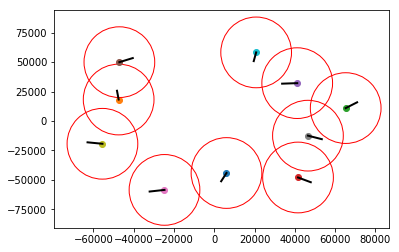

In [374]:
for i in range(len(xs)):
    plt.scatter(xs[i], ys[i])
    plt.scatter(xs[i], ys[i], s=10000**1/2, facecolors='none', edgecolors='r')
    x_n, y_n = destinacio(xs[i], ys[i], xss[i], yss[i])
    plt.plot([xs[i], x_n], [ys[i], y_n], 'k-', lw=2)

In [184]:
d['player_state']

Unnamed: 0  gameid            sessionid        playerguid  framenumber  \
1032      3920070     185  8330405089890209083    Pamela_Schmitt        12539   
1033      3920071     185  8330405089890209083    Alvin_Mcdonald        12539   
1034      3920072     185  8330405089890209083  Jonathan_Leblanc        12539   
1035      3920073     185  8330405089890209083      Amy_Campbell        12539   
1036      3920074     185  8330405089890209083    Matthew_Thomas        12539   
1037      3920075     185  8330405089890209083     Alex_Williams        12539   
1038      3920076     185  8330405089890209083  Melissa_Townsend        12539   
1039      3920077     185  8330405089890209083     Richard_Evans        12539   
1040      3920078     185  8330405089890209083      Intermediate        12539   
1041      3920079     185  8330405089890209083  Jonathan_Leblanc        12543   
1042      3920080     185  8330405089890209083     Alex_Williams        12543   
1043      3920081     185  8330405089890209083  Melissa_Townsend        12543   
1044      3920082     185  8330405089890209083      Intermediate        12543   
1045      3920083     185  8330405089890209083    Pamela_Schmitt        12543   
1046      3920084     185  8330405089890209083    Alvin_Mcdonald        12543   
1047      3920085     185  8330405089890209083    Matthew_Thomas        12543   
1048      3920086     185  8330405089890209083  Jonathan_Leblanc        12541   
1049      3920087     185  8330405089890209083      Amy_Campbell        12541   
1050      3920088     185  8330405089890209083     Alex_Williams        12541   
1051      3920089     185  8330405089890209083  Melissa_Townsend        12541   
1052      3920090     185  8330405089890209083      Intermediate        12541   
1053      3920091     185  8330405089890209083    Alvin_Mcdonald        12541   
1054      3920092     185  8330405089890209083    Matthew_Thomas        12541   
1055      3920093     185  8330405089890209083    Alvin_Mcdonald        12545   
1056      3920094     185  8330405089890209083    Matthew_Thomas        12545   
1057      3920095     185  8330405089890209083     Alex_Williams        12545   
1058      3920096     185  8330405089890209083  Melissa_Townsend        12545   
1059      3920097     185  8330405089890209083     Richard_Evans        12545   
1060      3920098     185  8330405089890209083      Intermediate        12545   
1061      3920099     185  8330405089890209083    Pamela_Schmitt        12545   
...           ...     ...                  ...               ...          ...   
51142     4183061     185  8330405089890209083    Matthew_Thomas        33154   
51143     4183062     185  8330405089890209083    Matthew_Thomas        33154   
51144     4183073     185  8330405089890209083    Matthew_Thomas        33156   
51145     4183074     185  8330405089890209083    Matthew_Thomas        33156   
51146     4183075     185  8330405089890209083    Matthew_Thomas        33158   
51147     4183076     185  8330405089890209083    Matthew_Thomas        33158   
51148     4183571     185  8330405089890209083    Matthew_Thomas        33160   
51149     4183572     185  8330405089890209083    Matthew_Thomas        33160   
51150     4183573     185  8330405089890209083    Matthew_Thomas        33162   
51151     4183574     185  8330405089890209083    Matthew_Thomas        33162   
51152     4183585     185  8330405089890209083    Matthew_Thomas        33164   
51153     4183586     185  8330405089890209083    Matthew_Thomas        33164   
51154     4183587     185  8330405089890209083    Matthew_Thomas        33166   
51155     4183588     185  8330405089890209083    Matthew_Thomas        33166   
51156     4183589     185  8330405089890209083    Matthew_Thomas        33168   
51157     4183590     185  8330405089890209083    Matthew_Thomas        33168   
51158     4183605     185  8330405089890209083    Matthew_Thomas        33170   
51159     4183606     185  83304050898

In [183]:
d['player_state'][d['player_state'].framenumber == 12547]

Unnamed: 0  gameid            sessionid        playerguid  framenumber  \
1062     3920100     185  8330405089890209083    Alvin_Mcdonald        12547   
1063     3920101     185  8330405089890209083    Matthew_Thomas        12547   
1064     3920102     185  8330405089890209083     Alex_Williams        12547   
1065     3920103     185  8330405089890209083  Melissa_Townsend        12547   
1066     3920104     185  8330405089890209083     Richard_Evans        12547   
1067     3920105     185  8330405089890209083      Intermediate        12547   

      frametime_ms          posX          posY         posZ     viewW  \
1062            30  29649.619141 -25750.003906   456.189484  0.504963   
1063            30 -20440.781250 -29060.476562   369.893982 -0.346933   
1064            30 -12002.721680  41026.078125  2891.604736  0.066870   
1065            30 -20294.630859 -29226.355469   345.221252  0.315163   
1066            30 -11963.492188  41169.488281  2897.434570 -0.065431   
1067            30  16884.173828 -10992.999023  1146.954956  0.544395   

         viewX     viewY     viewZ  tickflags  stateflags  fov  health  \
1062  0.008399  0.004914 -0.863086          0           1   90     600   
1063  0.026341  0.009748  0.937469          0           1   90     600   
1064  0.001961  0.000131 -0.997760          0           1   90     600   
1065  0.010918  0.003626 -0.948968          0           1   90     600   
1066  0.010475  0.000687  0.997802          0           1   90     600   
1067  0.003659 -0.002375  0.838817          0           1   90     600   

      weapon_id  
1062         21  
1063         11  
1064         11  
1065         11  
1066         14  
1067         14

In [109]:
d['player_state'][d['player_state'].framenumber == 12549]

Unnamed: 0  gameid            sessionid        playerguid  framenumber  \
1068     3920106     185  8330405089890209083    Alvin_Mcdonald        12549   
1069     3920107     185  8330405089890209083    Matthew_Thomas        12549   
1070     3920108     185  8330405089890209083     Alex_Williams        12549   
1071     3920109     185  8330405089890209083  Melissa_Townsend        12549   
1072     3920110     185  8330405089890209083     Richard_Evans        12549   
1073     3920111     185  8330405089890209083      Intermediate        12549   
1074     3920112     185  8330405089890209083    Alvin_Mcdonald        12549   
1075     3920113     185  8330405089890209083  Jonathan_Leblanc        12549   

      frametime_ms          posX          posY         posZ     viewW  \
1068            30  29626.472656 -25789.943359   466.878082  0.505437   
1069            30 -20440.781250 -29060.476562   369.893982 -0.377308   
1070            30 -12032.020508  41029.632812  2893.918945  0.066057   
1071            30 -20278.517578 -29222.570312   344.243195  0.314850   
1072            30 -11963.492188  41169.488281  2897.434570 -0.080445   
1073            30  16879.347656 -11029.054688  1157.668701  0.544154   
1074            30  29620.123047 -25801.011719   469.831055  0.505229   
1075            30  36322.390625  50261.738281  4541.025879 -0.644492   

         viewX     viewY     viewZ  tickflags  stateflags  fov  health  \
1068  0.011664  0.006833 -0.862757          0           1   90     600   
1069  0.040689  0.016596  0.925044          0           1   90     600   
1070  0.001004  0.000066 -0.997815          0           1   90     600   
1071  0.009373  0.003109 -0.949090          0           1   90     600   
1072  0.007454  0.000602  0.996731          0           1   90     600   
1073  0.003660 -0.002374  0.838974          0           1   90     600   
1074  0.011872  0.006951 -0.862876          0           1   90     600   
1075  0.000000  0.000000  0.764611          0           1    0     600   

      weapon_id  
1068         21  
1069         11  
1070         11  
1071         11  
1072         14  
1073         14  
1074         21  
1075          0

In [107]:
d['player_state'].groupby("framenumber").count()

Unnamed: 0  gameid  sessionid  playerguid  frametime_ms  posX  \
framenumber                                                                  
12539                 9       9          9           9             9     9   
12541                 7       7          7           7             7     7   
12543                 7       7          7           7             7     7   
12545                 7       7          7           7             7     7   
12547                 6       6          6           6             6     6   
12549                 8       8          8           8             8     8   
12551                 7       7          7           7             7     7   
12553                 7       7          7           7             7     7   
12555                 7       7          7           7             7     7   
12557                 4       4          4           4             4     4   
12559                 4       4          4           4             4     4   
12561                 7       7          7           7             7     7   
12563                 6       6          6           6             6     6   
12565                 6       6          6           6             6     6   
12567                 5       5          5           5             5     5   
12569                 6       6          6           6             6     6   
12571                 5       5          5           5             5     5   
12573                 5       5          5           5             5     5   
12575                 4       4          4           4             4     4   
12577                 5       5          5           5             5     5   
12579                 5       5          5           5             5     5   
12581                 6       6          6           6             6     6   
12583                 5       5          5           5             5     5   
12585                 6       6          6           6             6     6   
12587                 5       5          5           5             5     5   
12589                 4       4          4           4             4     4   
12591                 4       4          4           4             4     4   
12593                 5       5          5           5             5     5   
12595                 4       4          4           4             4     4   
12597                 5       5          5           5             5     5   
...                 ...     ...        ...         ...           ...   ...   
33124                 2       2          2           2             2     2   
33126                 2       2          2           2             2     2   
33128                 2       2          2           2             2     2   
33130                 2       2          2           2             2     2   
33132                 2       2          2           2             2     2   
33134                 2       2          2           2             2     2   
33136                 2       2          2           2             2     2   
33138                 2       2          2           2             2     2   
33140                 2       2          2           2             2     2   
33142                 2       2          2           2             2     2   
33144                 2       2          2           2             2     2   
33146                 2       2          2           2             2     2   
33148                 2       2          2           2             2     2   
33150                 2       2          2           2             2     2   
33152                 2       2          2           2             2     2   
33154                 2       2          2           2             2     2   
33156                 2       2          2           2             2     2   
33158                 2       2          2           2             2     2   
33160                 2       2    

In [73]:
[eval(i) for i in d['game_frame'].players.dropna()]

[[{'state': {'team_id': 0,
    'state': {'tickflags': 0,
     'position': {'x': 40711.34765625,
      'z': 4143.73876953125,
      'y': 42734.99609375},
     'stateflags': 1,
     'health': 600,
     'weapon_id': 14,
     'viewangles': {'x': 0.038652822375297546,
      'w': 0.8955423831939697,
      'z': -0.43613114953041077,
      'y': 0.07936887443065643},
     'fov': 90},
    'character_id': 0},
   'guid': 'Pamela_Schmitt'},
  {'state': {'team_id': 0,
    'state': {'tickflags': 0,
     'position': {'x': 28098.96484375, 'z': 787.695556640625, 'y': -37868.0},
     'stateflags': 1,
     'health': 600,
     'weapon_id': 21,
     'viewangles': {'x': 0.04182896390557289,
      'w': 0.8639152646064758,
      'z': -0.49659380316734314,
      'y': 0.07276909053325653},
     'fov': 90},
    'character_id': 0},
   'guid': 'Alvin_Mcdonald'},
  {'state': {'team_id': 0,
    'state': {'tickflags': 0,
     'position': {'x': 28098.892578125,
      'z': 790.9609985351562,
      'y': -37953.390625},
 

In [58]:
k = {}
for i in d['game_frame'].index:
    fn = d['game_frame'].framenumber[i];
    if type(d['game_frame'].players[i]) == str:
        k[fn] = [j for j in eval(d['game_frame'].players[i]) if j['guid'] == 'Intermediate']

In [386]:
dx = xmax-xmin

NameError: name 'xmax' is not defined

const HORIZONTAL_OFFSET = SIDE_LENGTH
const HORIZONTAL_START = -77940 // Map X min coordinate
const HORIZONTAL_END = 78080 // Map X max coordinate
const HORIZONTAL_CLAMP = 650
const VERTICAL_START = -75040 // Map Y min coordinate
const VERTICAL_END = 75060 // Map Y max coordinate

/home/pau/anaconda3/lib/python3.7/site-packages/scipy/spatial/_plotutils.py:20: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()


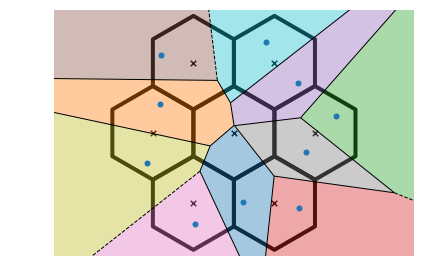

In [499]:
xmax = 78080
xmin = -77940
ymax = 75060
ymin = -75040

dx = xmax-xmin
dy = ymax-ymin

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

from scipy.spatial import Voronoi, voronoi_plot_2d

centres = [(0,0),(dx/3, 0),(-dx/3, 0.0),(dx/6, cos30*dx/3),(-dx/6, cos30*dx/3),(dx/6, -cos30*dx/3),(-dx/6, -cos30*dx/3)]
cos30 = 0.86602540378
fig, ax = plt.subplots()
#voronoi_plot_2d(Voronoi(list(zip(xs,ys))))


# plot
#regions, vertices = voronoi_finite_polygons_2d(Voronoi(list(zip(xs,ys))))

# colorize

# create 3x3 grid to plot the artists
patches = []

# add a Polygon
polygon = mpatches.RegularPolygon((0.0, 0.0), 6, dx/6/cos30)
patches.append(polygon)

polygon2 = mpatches.RegularPolygon((dx/3, 0), 6, dx/6/cos30, alpha = 0)
patches.append(polygon2)

polygon3 = mpatches.RegularPolygon((-dx/3, 0.0), 6, dx/6/cos30, alpha = 0)
patches.append(polygon3)

polygon4 = mpatches.RegularPolygon((dx/6, cos30*dx/3), 6, dx/6/cos30, alpha = 0)
patches.append(polygon4)

polygon5 = mpatches.RegularPolygon((-dx/6, cos30*dx/3), 6, dx/6/cos30, alpha = 0)
patches.append(polygon5)

polygon6 = mpatches.RegularPolygon((dx/6, -cos30*dx/3), 6, dx/6/cos30, alpha = 0)
patches.append(polygon6)

polygon7 = mpatches.RegularPolygon((-dx/6, -cos30*dx/3), 6, dx/6/cos30, alpha = 0)
patches.append(polygon7)


voronoi_plot_2d(Voronoi(list(zip(xs,ys))), ax = ax, show_vertices = False, point_size = 10)
colors = np.linspace(0, 0.1, len(patches)+1)
collection = PatchCollection(patches, alpha=1, cmap = 'gist_gray', lw = 4)
collection.set_array(np.array([colors[0]]*7))
collection.set_facecolor('none')
collection.set_edgecolor([(1,1,1)])

ax.add_collection(collection)
for i in centres:
    plt.scatter(i[0],i[1], marker = 'x', s = 30, color = 'black')
    
    
for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.axis('equal')
plt.axis('off')
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])

plt.tight_layout()


In [459]:
colors[0]

0.0